# Toyota Corolla 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Multi Linear Regression\\ToyotaCorolla.csv", encoding= 'latin')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Insights, EDA and Visualization

In [3]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

##### Selcting Required Columns

In [5]:
df = data.iloc[:, [2,3,6,8,12,13,15,16,17]]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
df.rename({'Age_08_04':'Age', 'Quarterly_Tax':'Tax'},axis=1, inplace= True)

In [7]:
df

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
df.duplicated().sum()

1

In [9]:
df= df.drop_duplicates()

In [10]:
df.shape

(1435, 9)

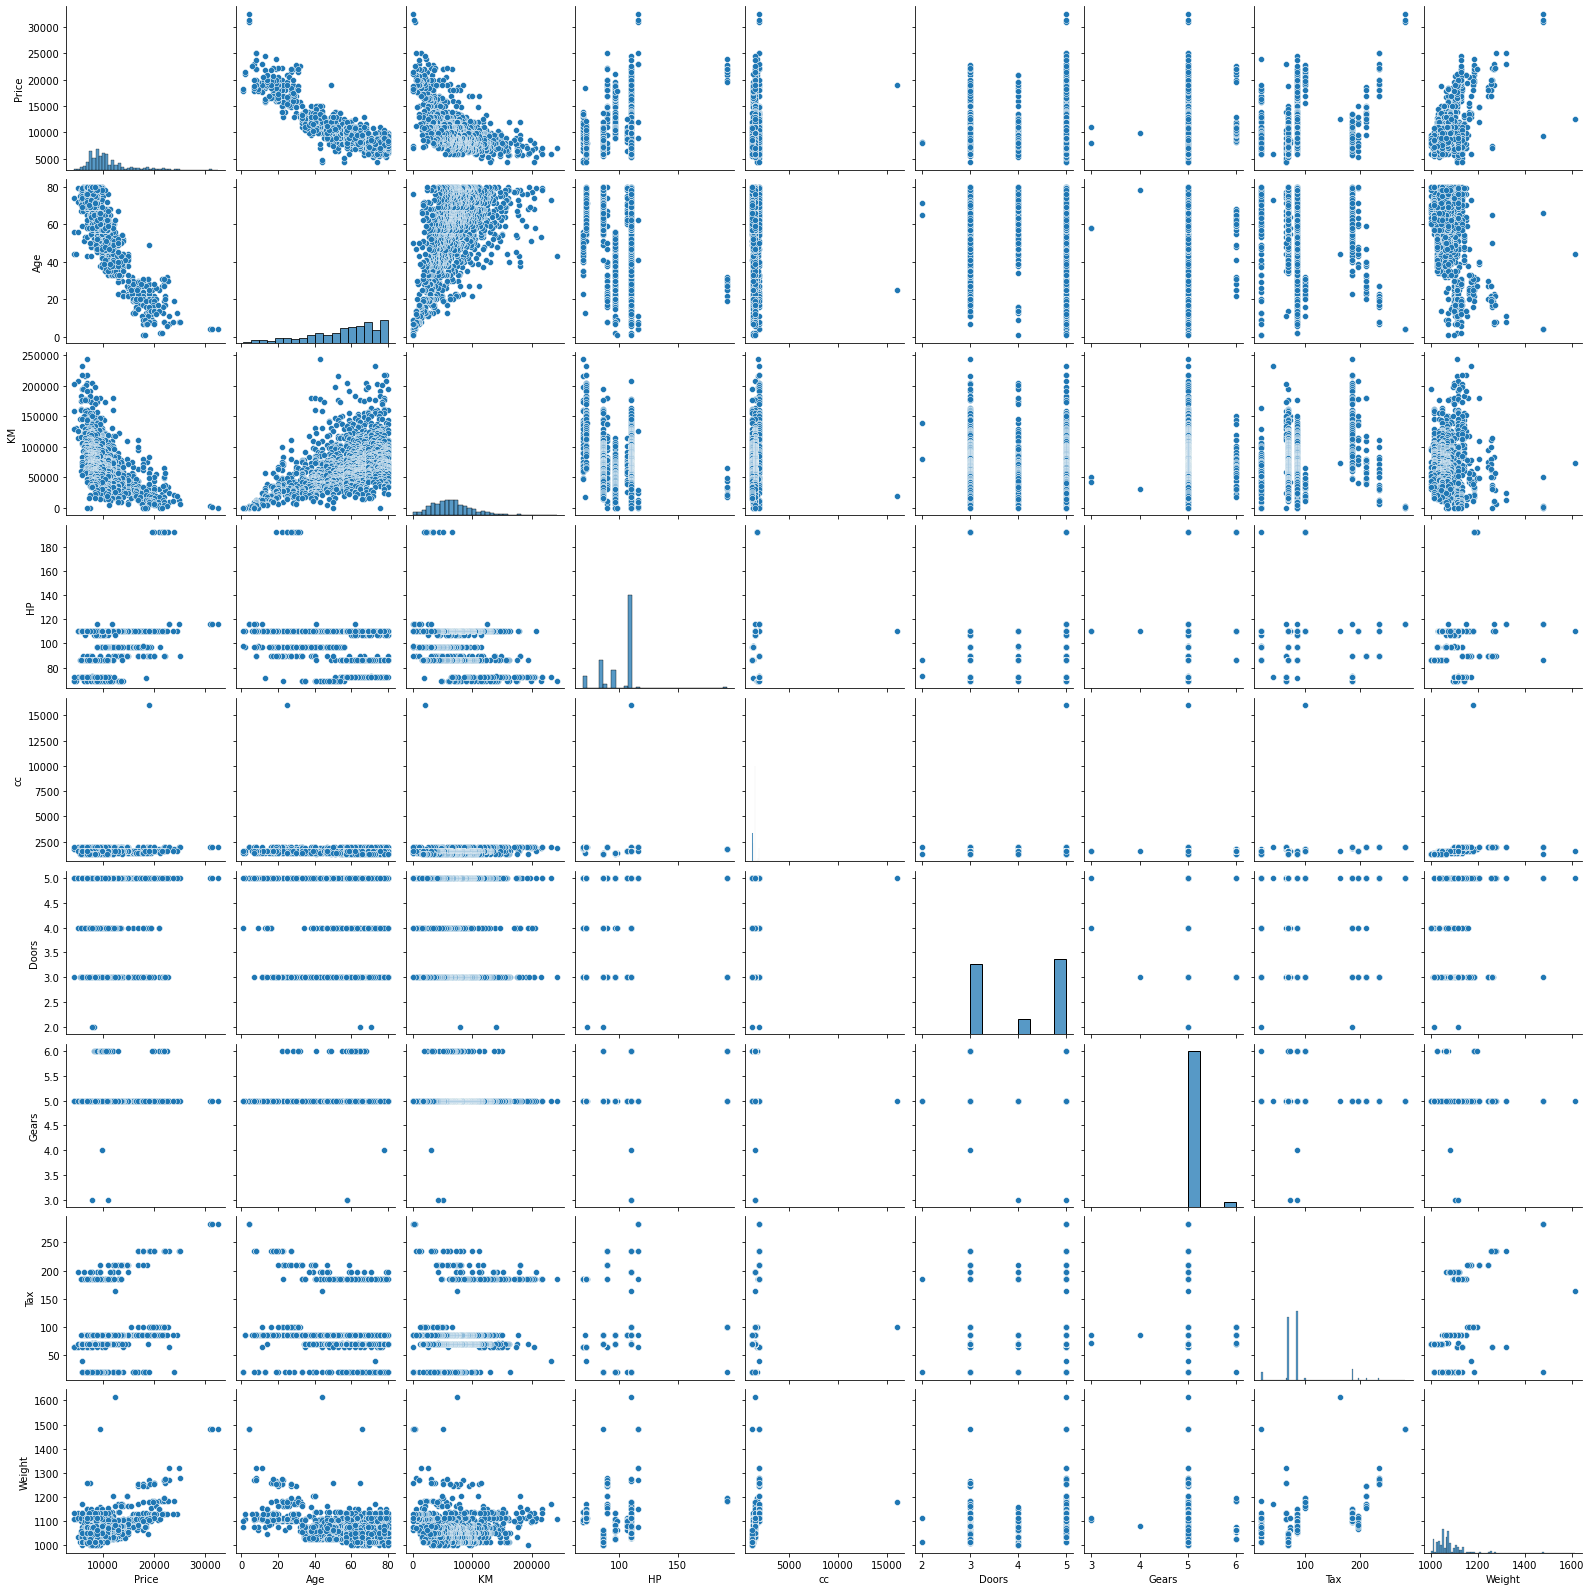

In [11]:
sns.pairplot(df)

## Correlation Analysis

In [12]:
df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

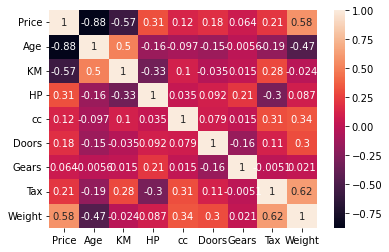

In [14]:
sns.heatmap(df.corr(), annot=True )

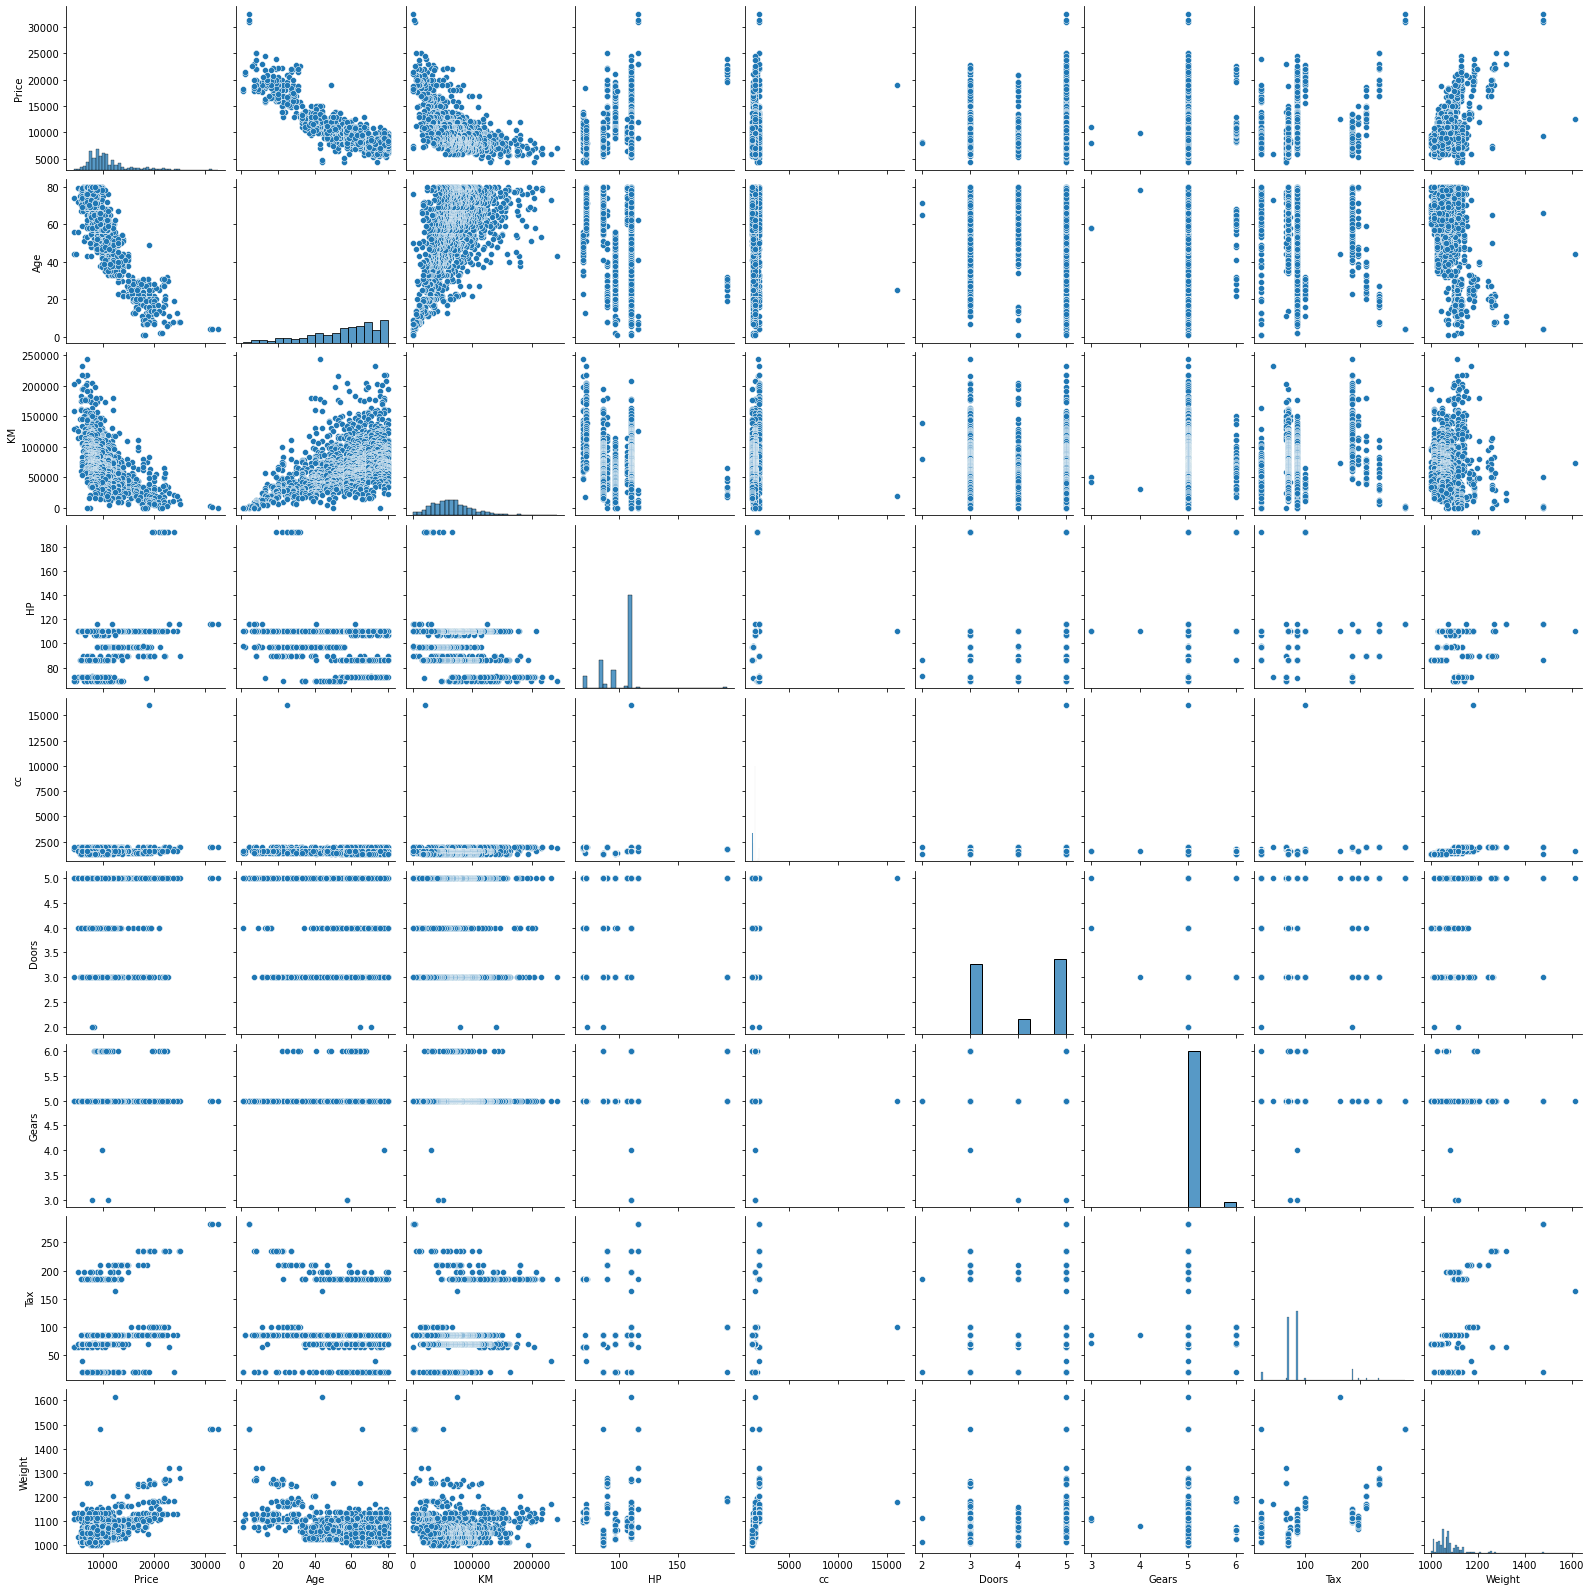

In [16]:
sns.pairplot(df)

## Model Building

In [17]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight', data = df).fit()

In [18]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [19]:
print(model.tvalues, model.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
Tax           2.944198
Weight       15.760663
dtype: float64 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
Tax           3.290363e-03
Weight        1.031118e-51
dtype: float64


In [20]:
# cc and Doors have pvalue > 0.05

In [21]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [22]:
cc=smf.ols('Price~cc',data=df).fit()
cc.tvalues , cc.pvalues 

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [23]:
Doors =smf.ols('Price~Doors',data=df).fit()
Doors.tvalues , Doors.pvalues 

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [24]:
Doors_cc =smf.ols('Price~Doors+cc',data=df).fit()
Doors_cc.tvalues , Doors_cc.pvalues 

(Intercept    12.786341
 Doors         6.752236
 cc            4.268006
 dtype: float64,
 Intercept    1.580945e-35
 Doors        2.109558e-11
 cc           2.101878e-05
 dtype: float64)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:43:09   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

## 1. Collinearity check
VIF = 1/(1-Rsquare)

In [26]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+Tax+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Tax+Weight',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+Tax+Weight',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+Tax+Weight',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age+KM+HP+cc+Doors+Tax+Weight',data=df).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Tax=smf.ols('Tax~Age+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared
vif_Tax=1/(1-rsq_Tax)

rsq_Weight=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Tax',data=df).fit().rsquared
vif_Weight=1/(1-rsq_Weight)


t={'Variables':['Age','KM','HP','cc','Doors','Gears','Tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Tax,vif_Weight]}
Vif_df=pd.DataFrame(t)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Tax,2.295375
7,Weight,2.487180


In [27]:
# No vif above 20. Hence, no collinearity

# 2. Residual Analysis

## Normality of Residuals (Q-Q plot)

In [28]:
import statsmodels.api as sm

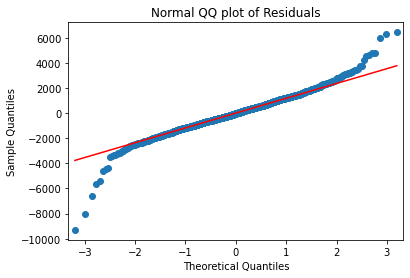

In [29]:
qq_plot = sm.qqplot(model.resid, line = 'q')
plt.title('Normal QQ plot of Residuals')
plt.show()

In [30]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

## Residual Plot for Homoscedasticity

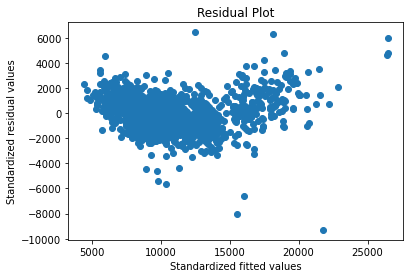

In [31]:
plt.scatter((model.fittedvalues), (model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

Outliers are visible

## Residual Vs Regressors

eval_env: 1


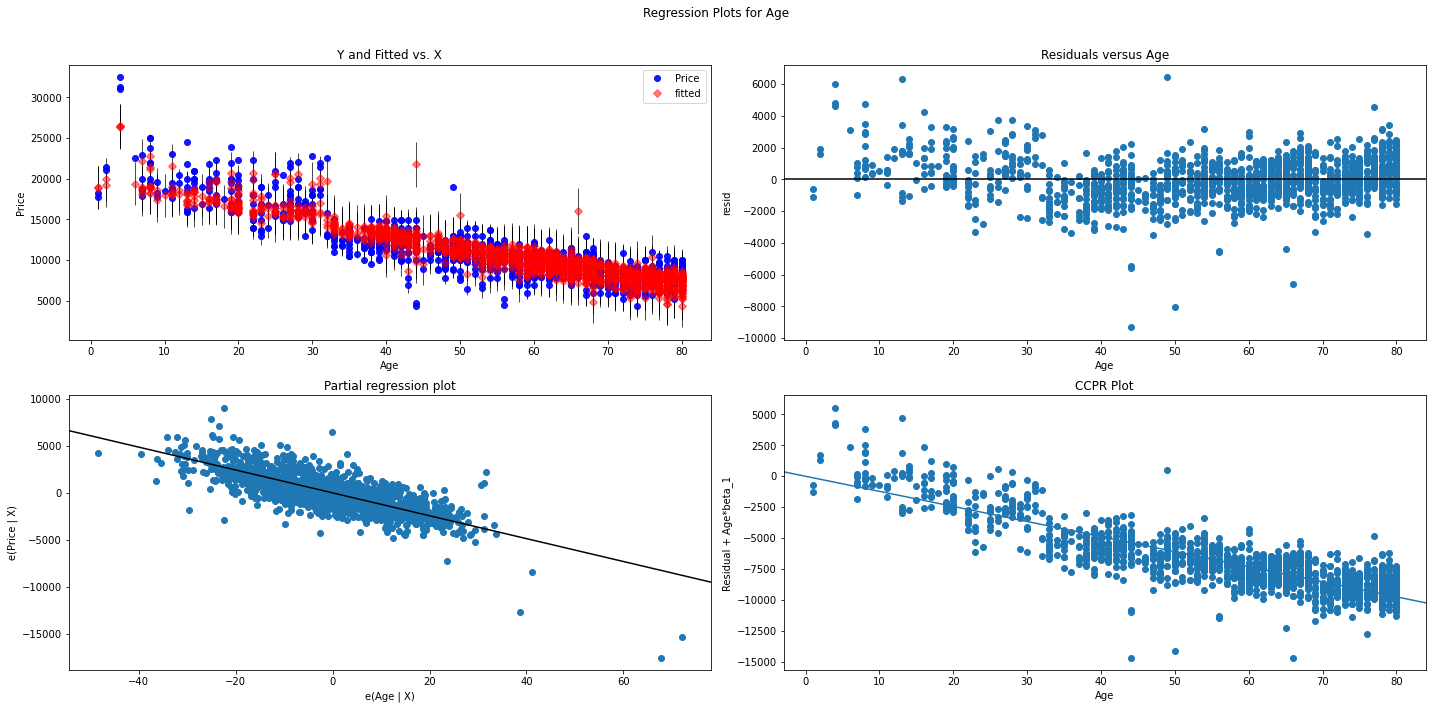

In [32]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Age', fig= figure)
plt.show()

eval_env: 1


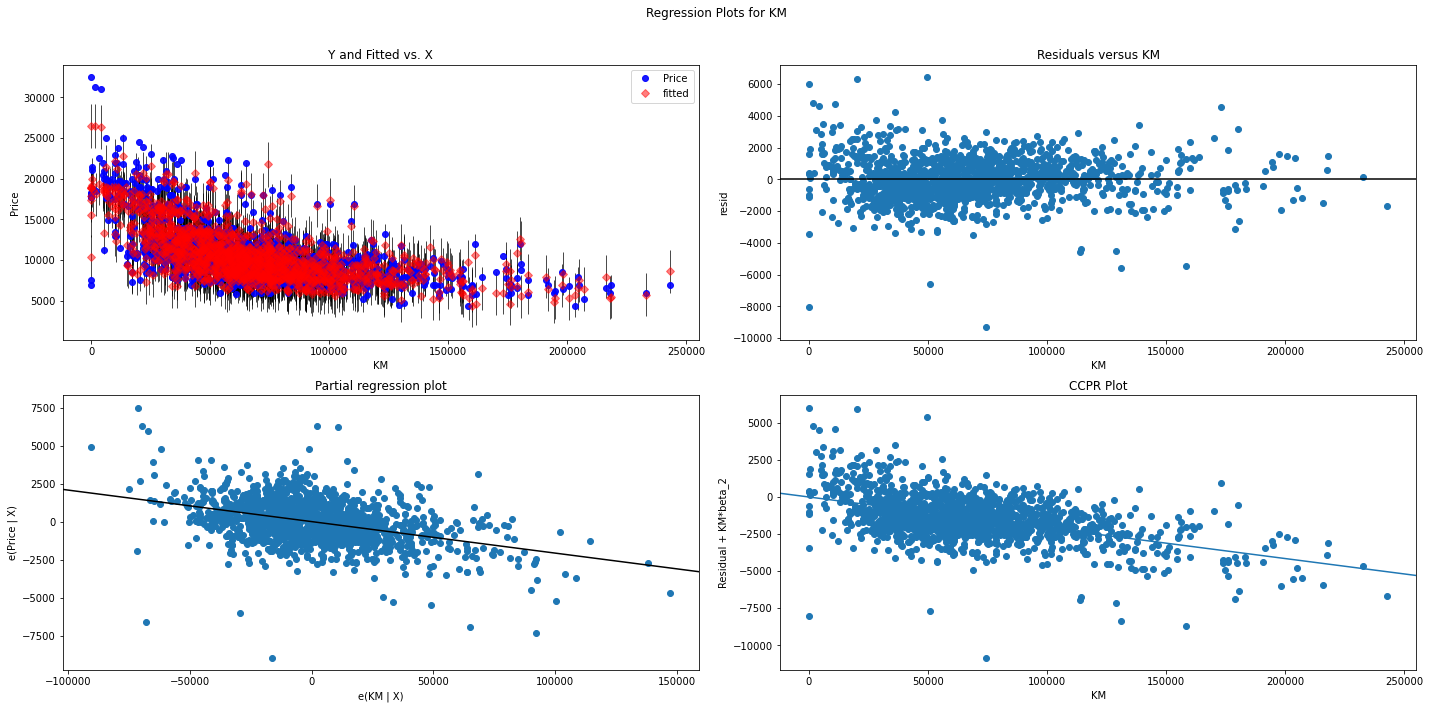

In [33]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'KM', fig= figure)
plt.show()

eval_env: 1


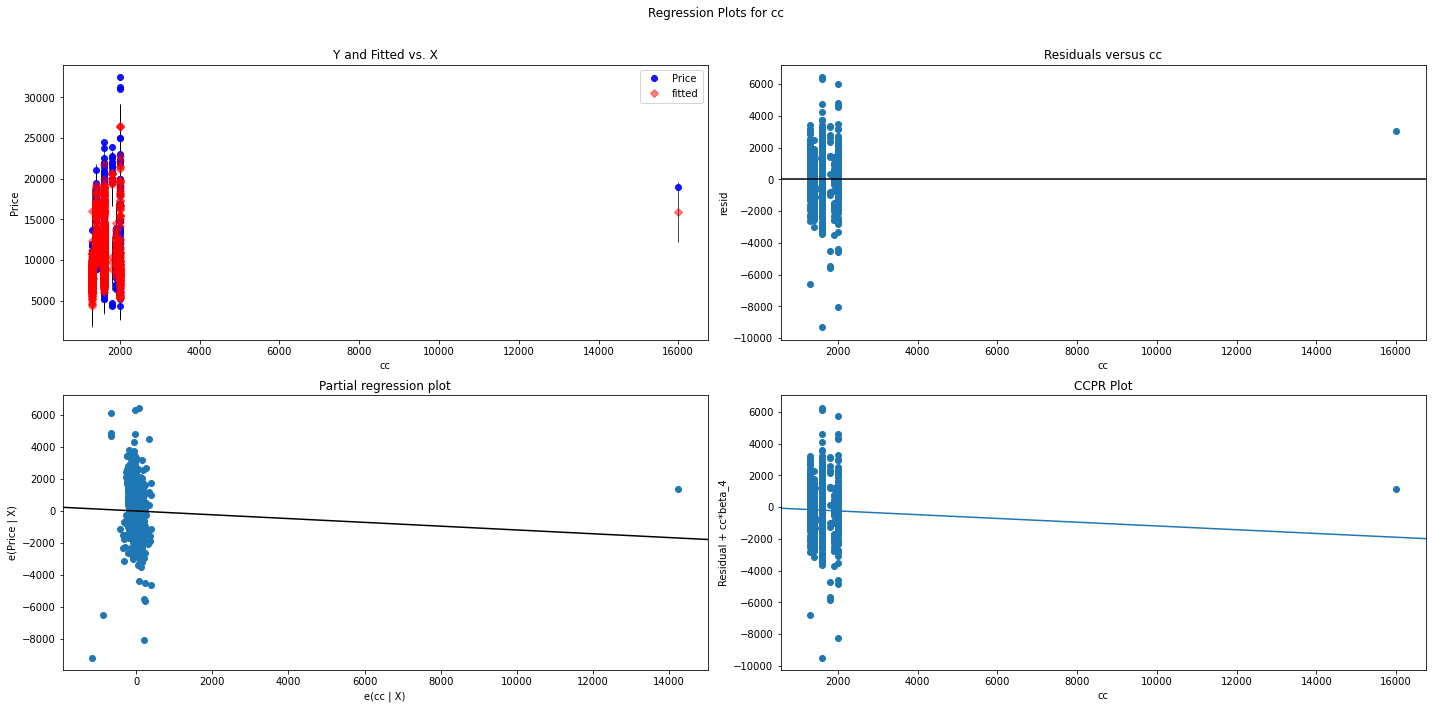

In [34]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'cc', fig= figure)
plt.show()

eval_env: 1


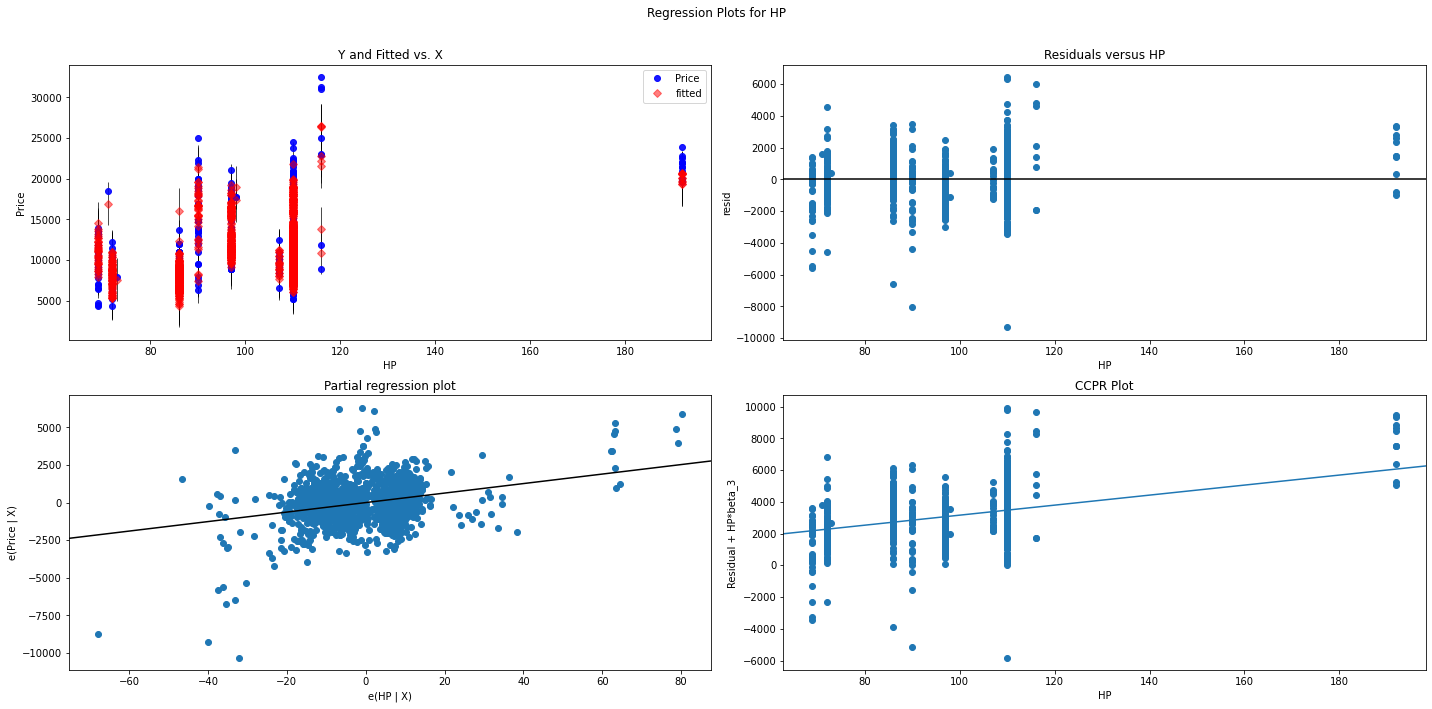

In [37]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'HP', fig= figure)
plt.show()

eval_env: 1


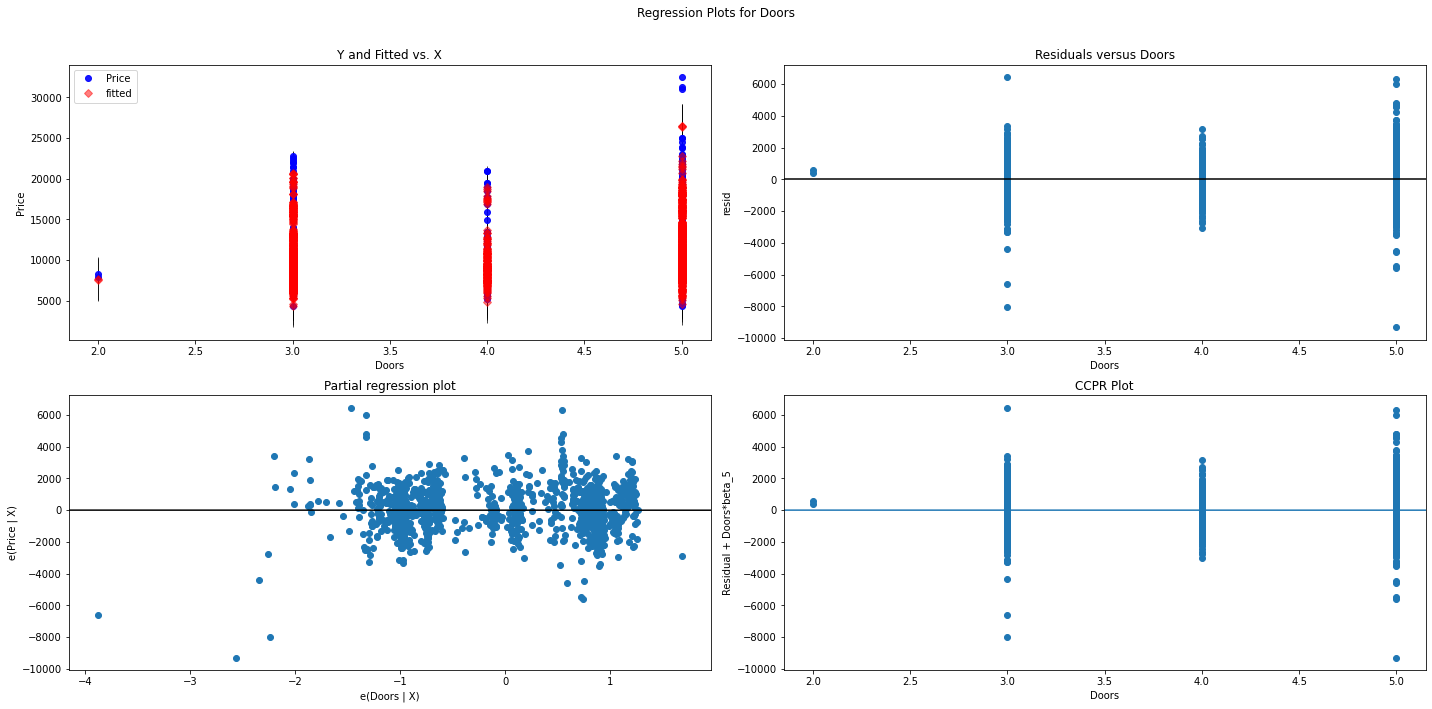

In [38]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Doors', fig= figure)
plt.show()

eval_env: 1


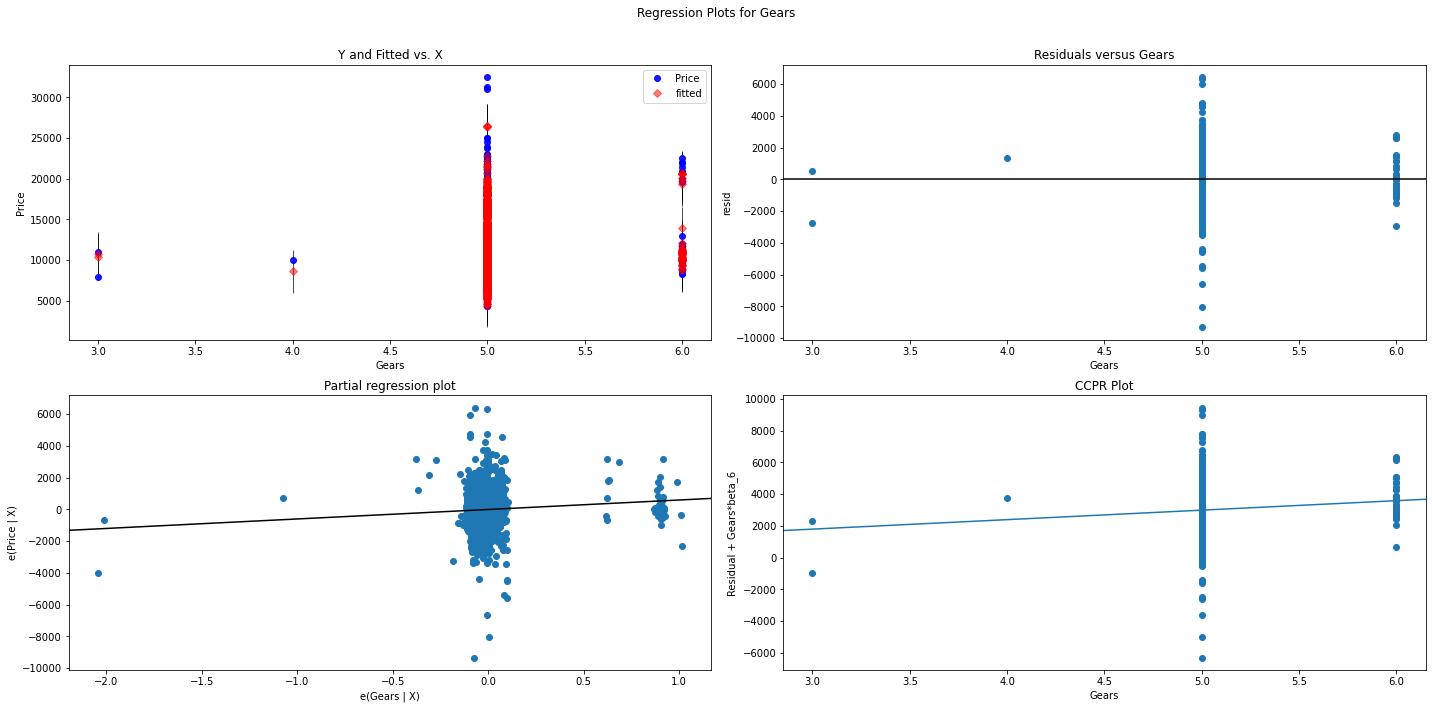

In [40]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Gears', fig= figure)
plt.show()

eval_env: 1


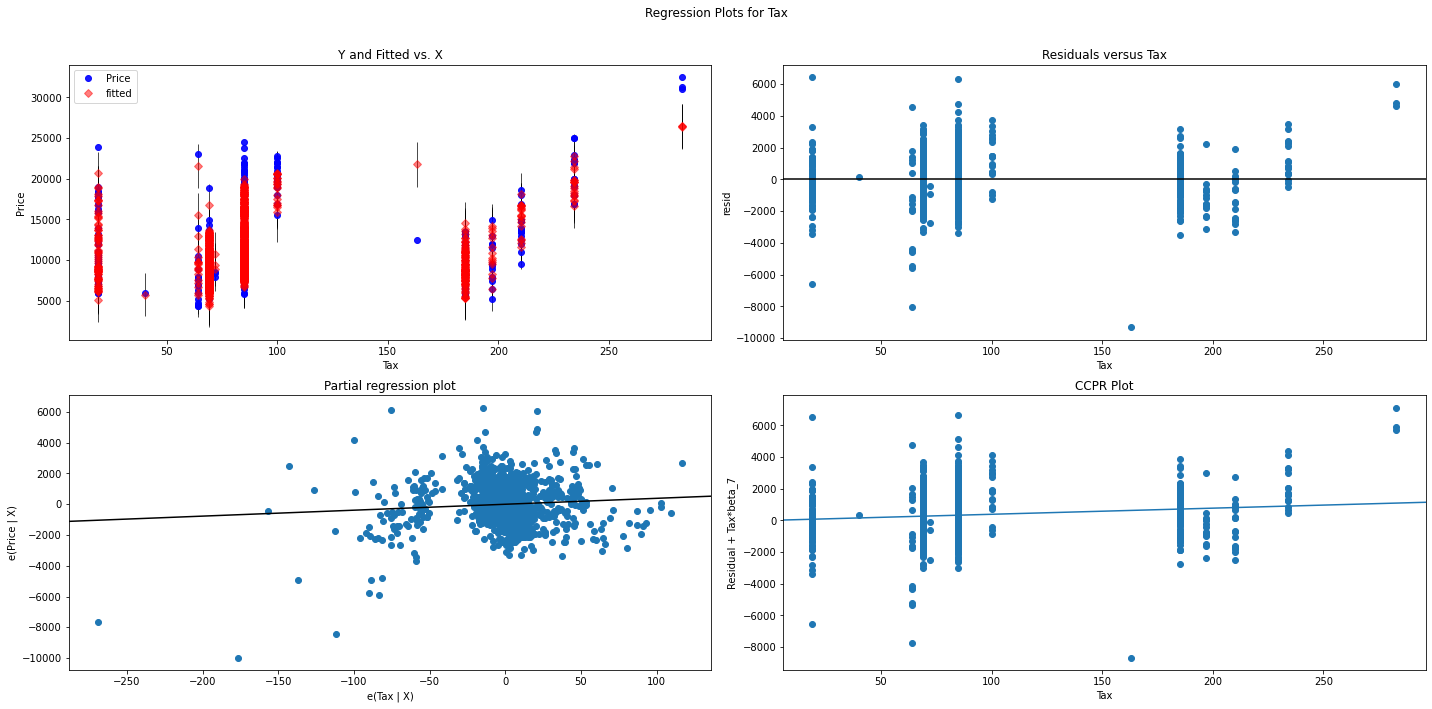

In [41]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Tax', fig= figure)
plt.show()

eval_env: 1


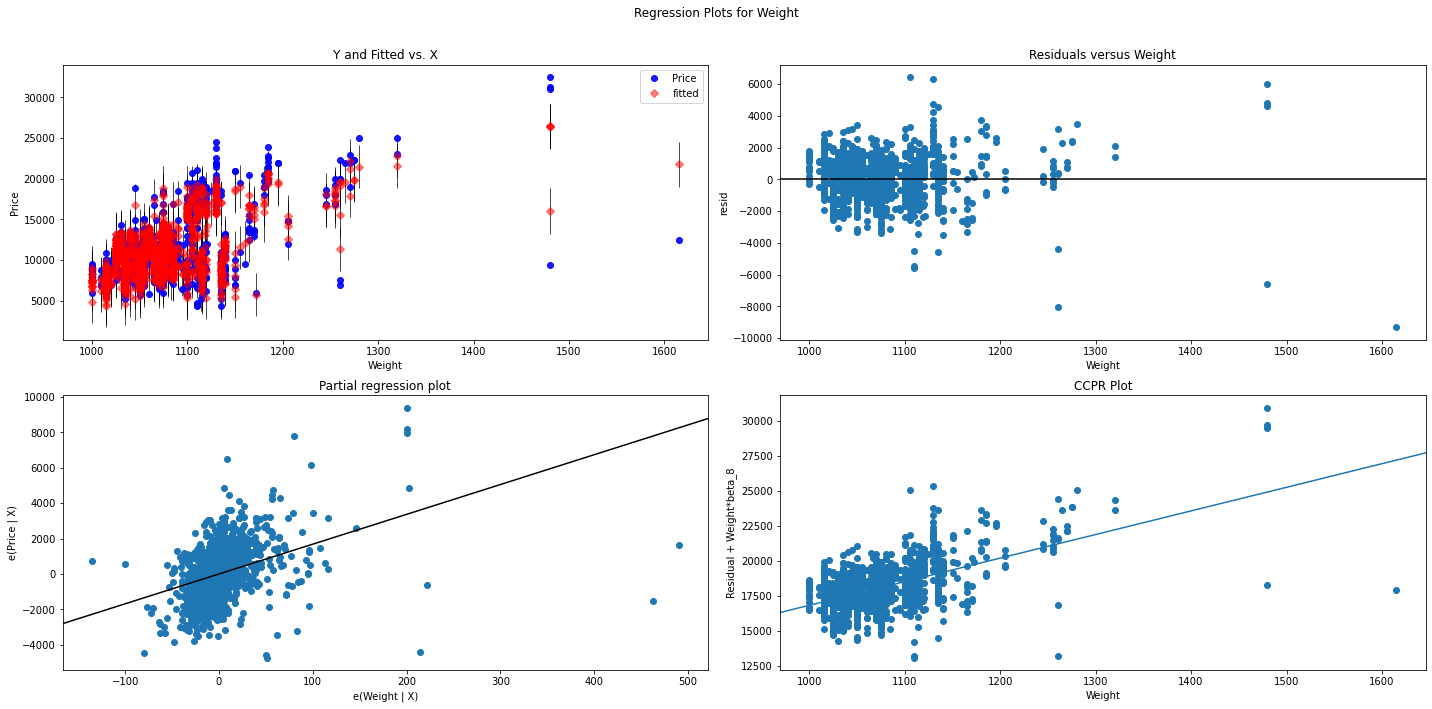

In [42]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Weight', fig= figure)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

#### 1. Cook's Distance

In [43]:
influencers = model.get_influence()
(a,_)= influencers.cooks_distance

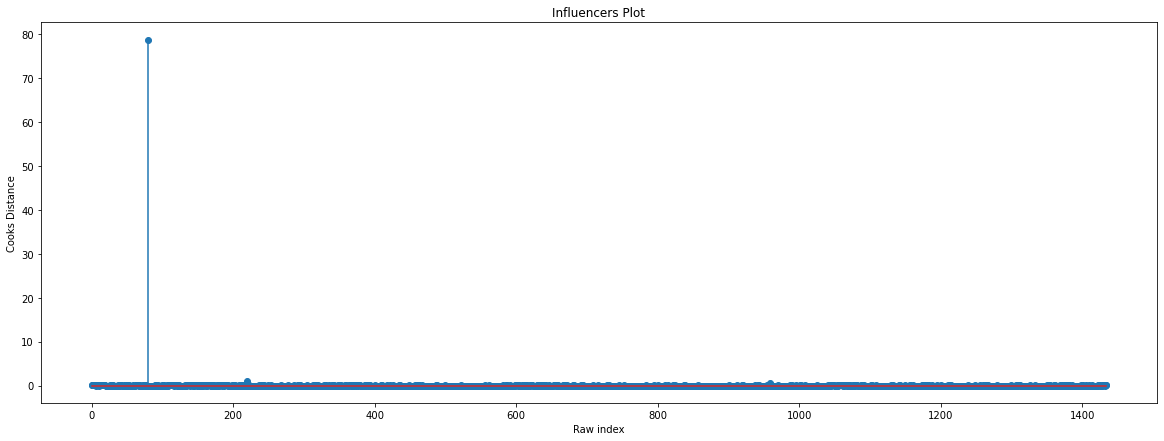

In [44]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)),np.round(a,3))
plt.title('Influencers Plot')
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
np.argmax(a) , np.max(a)

(80, 78.7295058224851)

#### 2. High Influence Point

In [46]:
from statsmodels.graphics.regressionplots import influence_plot

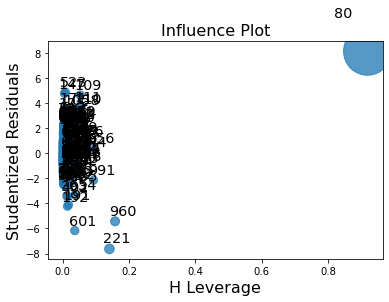

In [47]:
influence_plot(model)
plt.show()

In [48]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [49]:
leverage_cutoff

0.020905923344947737

#### Conclusion
Outlier datapoint = Row 80th

# Model 2 (Deleting the 49th row)

In [51]:
df1 = df.copy()

In [52]:
df1 = df1.drop(df1.index[[49]], axis=0)

In [55]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight', data = df1).fit()
model2

In [57]:
model2.params

Intercept   -5161.622559
Age          -121.627840
KM             -0.020842
HP             30.834886
cc             -0.115589
Doors          -2.450806
Gears         557.823760
Tax             3.810196
Weight         16.829224
dtype: float64

In [58]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1112.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:54:35   Log-Likelihood:                -12356.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1425   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5161.6226   1419.556     -3.636      0.000   -7946.266   -2376.979
Age         -121.6278      2.612    -46.559      0.000    -126.752    -116.503
KM            -0.0208      0.001    -16.637      0.000      -0.023      -0.018
HP            30.8349      2.840     10.856      0.000      25.263      36.407
cc            -0.1156      0.090     -1.285      0.199      -0.292       0.061
Doors         -2.4508     39.955     -0.061      0.951     -80.829      75.927
Gears        557.8238    197.811      2.820      0.005     169.791     945.856
Tax            3.8102      1.310      2.910      0.004       1.241       6.379
Weight        16.8292      1.068     15.751      0.000      14.733      18.925
==============================================================================
Omnibus:                      150.651   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1019.190
Skew:                          -0.204   Prob(JB):                    4.85e-222
Kurtosis:                       7.110   Cond. No.                     3.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model

In [88]:
while model.rsquared < 0.90:
    for a in [np.max(a)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
        (a,_)=model.get_influence().cooks_distance
        a
        np.argmax(a) , np.max(a)
        toyo5=toyo5.drop(toyo5.index[[np.argmax(a)]],axis=0).reset_index(drop=True)
        toyo5
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

In [87]:
final_model.params

Intercept   -9300.095415
Age          -108.065615
KM             -0.009229
HP             50.441066
cc             -5.458762
Doors        -180.070931
Gears         175.270763
Tax            10.450047
Weight         27.033516
dtype: float64

In [89]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     359.3
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          1.10e-153
Time:                        17:18:28   Log-Likelihood:                -2723.4
No. Observations:                 325   AIC:                             5465.
Df Residuals:                     316   BIC:                             5499.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9300.0954   4059.304     -2.291      0.023   -1.73e+04   -1313.417
Age         -108.0656      6.524    -16.565      0.000    -120.901     -95.230
KM            -0.0092      0.003     -2.759      0.006      -0.016      -0.003
HP            50.4411      6.244      8.078      0.000      38.156      62.726
cc            -5.4588      0.727     -7.506      0.000      -6.890      -4.028
Doors       -180.0709     78.835     -2.284      0.023    -335.180     -24.962
Gears        175.2708    570.567      0.307      0.759    -947.319    1297.860
Tax           10.4500      3.251      3.215      0.001       4.055      16.845
Weight        27.0335      3.353      8.064      0.000      20.437      33.630
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.754
Skew:                          -0.043   Prob(JB):                        0.686
Kurtosis:                       3.220   Cond. No.                     4.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion
The accuracy has been increased to 90.1%, by eliminating the outliers.

## Prediction

In [91]:
new_data = pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":2,"Gears":4,"Tax":56,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,12,40000,80,1300,2,4,56,1012


In [93]:
final_model.predict(new_data)

0    14256.898013
dtype: float64

#### End